In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [4]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Using downloaded and verified file: data/FashionMNIST/raw/train-images-idx3-ubyte.gz
Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw

Using downloaded and verified file: data/FashionMNIST/raw/train-labels-idx1-ubyte.gz
Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw

Using downloaded and verified file: data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz
Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw

Using downloaded and verified file: data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



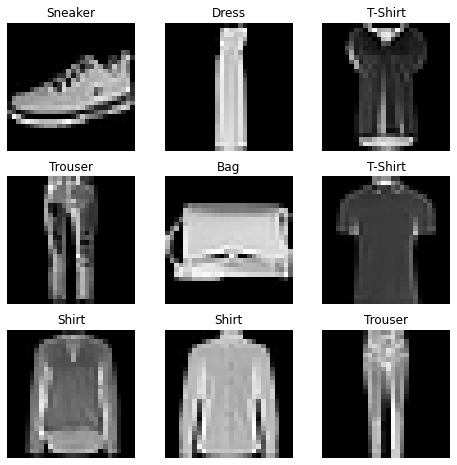

In [5]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
Label: 0


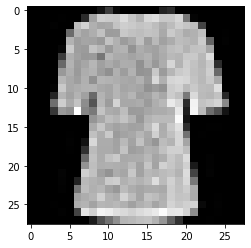

In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    # ToTensor 将 PIL 图像或 NumPy ndarray 转换为 FloatTensor。并在 [0., 1.] 范围内缩放图像的像素强度值
    transform=ToTensor(),
    # Lambda 转换应用任何用户定义的 lambda 函数。在这里，我们定义了一个函数来将整数转换为 one-hot 编码张量。它首先创建一个大小为 10（我们数据集中的标签数量）的零张量，并调用 scatter_，它在标签 y 给定的索引上分配 value=1。
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)


In [9]:
# scatter_ src将对应位置的值 填入到指定 dim，index 的地方

src = torch.arange(1, 11).reshape((2, 5))
print(src)
index = torch.tensor([[0, 1, 2, 0]])
A = torch.zeros(3, 5, dtype=src.dtype).scatter_(0, index, src)
print(A)

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])
tensor([[1, 0, 0, 4, 0],
        [0, 2, 0, 0, 0],
        [0, 0, 3, 0, 0]])
